In [1]:
import pandas as pd

In [2]:
star_wars = pd.read_csv('star_wars.csv', encoding='ISO-8859-1')
star_wars.dropna(subset=['RespondentID'], inplace=True)

### Convert two columns of Questions to the Boolean type.

In [3]:
yes_no = {
    'Yes': True,
    'No': False
}
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

### Convert columns of Movies to the Boolean type

In [4]:
movies_col = ['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8']

In [5]:
cinema_boolean = {
    'Star Wars: Episode I  The Phantom Menace': True,
    'Star Wars: Episode II  Attack of the Clones': True,
    'Star Wars: Episode III  Revenge of the Sith': True,
    'Star Wars: Episode IV  A New Hope': True,
    'Star Wars: Episode V The Empire Strikes Back': True,
    'Star Wars: Episode VI Return of the Jedi': True
}
for i in movies_col:
    star_wars[i] = star_wars[i].map(cinema_boolean)

In [6]:
star_wars['Which of the following Star Wars films have you seen? Please select all that apply.'].value_counts()

True    673
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64

### Rename columns

In [7]:
star_wars.columns[3:9]

Index(['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

In [8]:
star_wars.rename(columns = {'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
                    'Unnamed: 4': 'seen_2', 
                    'Unnamed: 5': 'seen_3', 
                    'Unnamed: 6': 'seen_4', 
                    'Unnamed: 7': 'seen_5', 
                    'Unnamed: 8': 'seen_6'}, inplace=True)

In [9]:
star_wars.columns[3:9]

Index(['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6'], dtype='object')

### Convert 9:14 columns to float type

In [10]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

### Rename 9:14 columns

In [11]:
star_wars.columns[9:15]

Index(['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14'],
      dtype='object')

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
star_wars.rename(columns = {'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
               'Unnamed: 10': 'ranking_2', 
                'Unnamed: 11': 'ranking_3', 
                'Unnamed: 12': 'ranking_4', 
                'Unnamed: 13': 'ranking_5',
                'Unnamed: 14': 'ranking_6'}, inplace=True)

In [13]:
star_wars.columns[9:15]

Index(['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5',
       'ranking_6'],
      dtype='object')

### Find the mean of each ranking columns and create bar plot

In [14]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [15]:
star_wars[star_wars.columns[9:15]].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

<Container object of 6 artists>

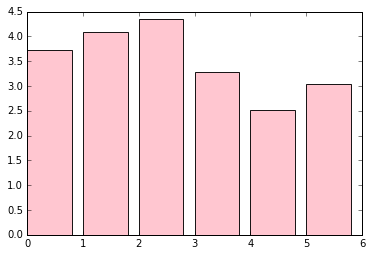

In [16]:
plt.bar(range(6), star_wars[star_wars.columns[9:15]].mean(), color='pink', alpha=0.9)

### Summarize seen columns and create bar plot

In [17]:
star_wars[star_wars.columns[3:9]].sum()

seen_1    673.0
seen_2    571.0
seen_3    550.0
seen_4    607.0
seen_5    758.0
seen_6    738.0
dtype: float64

<Container object of 6 artists>

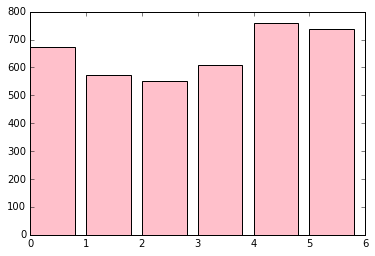

In [18]:
plt.bar(range(6), star_wars[star_wars.columns[3:9]].sum(), color='pink')

### Split movie by gender and create a bar plot

In [19]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

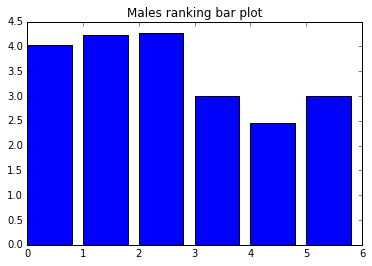

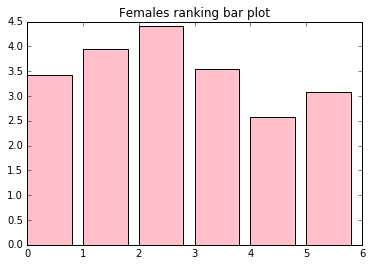

In [20]:
plt.bar(range(6), males[males.columns[9:15]].mean(), color='blue')
plt.title('Males ranking bar plot')
plt.show()

plt.bar(range(6), females[females.columns[9:15]].mean(), color='pink')
plt.title('Females ranking bar plot')
plt.show()

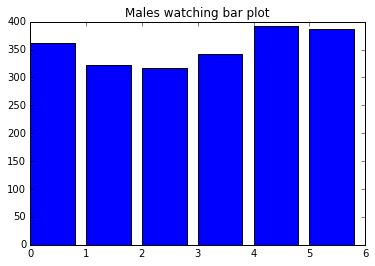

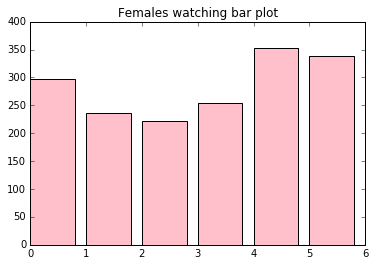

In [21]:
plt.bar(range(6), males[males.columns[3:9]].sum(), color='blue')
plt.title('Males watching bar plot')
plt.show()

plt.bar(range(6), females[females.columns[3:9]].sum(), color='pink')
plt.title('Females watching bar plot')
plt.show()

### Clean NaN in Education columns

In [22]:
star_wars['Education'].fillna('Less than high school degree', inplace=True)

In [23]:
star_wars['Education'].value_counts(dropna=False)

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
Less than high school degree        157
High school degree                  105
Name: Education, dtype: int64

### Summarize each value in Education column and create bar plot

In [24]:
education = ['Some college or Associate degree',
            'Bachelor degree',
            'Graduate degree',
            'Less than high school degree',
            'High school degree']
star_wars_one = star_wars.copy()
for i in education:
    star_wars_one[i] = star_wars_one['Education'] == i
    
    
star_wars_one.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Gender,Age,Household Income,Education,Location (Census Region),Some college or Associate degree,Bachelor degree,Graduate degree,Less than high school degree,High school degree
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,...,Male,18-29,NaN,High school degree,South Atlantic,False,False,False,False,True
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central,False,True,False,False,False
3,3.292765e+09,True,False,True,True,True,NaN,NaN,NaN,1.0,...,Male,18-29,"$0 - $24,999",High school degree,West North Central,False,False,False,False,True
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,...,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central,True,False,False,False,False
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,...,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central,True,False,False,False,False


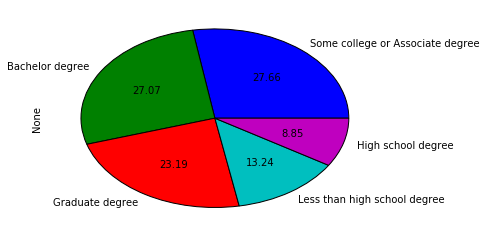

In [49]:
ed = star_wars_one.iloc[:,38:43].sum()
ed.plot.pie(autopct='%.2f')